In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge_IIoTset__DatasetFL.pdf
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Readme.txt
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_ICMP_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_TCP_SYN_Flood_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/MITM (ARP spoofing + DNS) Attack.pcap
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/Uploading_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/XSS_attack.csv
/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Attack traffic/DDoS_UD

In [2]:
df_dnn = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

In [3]:
df_ml = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/ML-EdgeIIoT-dataset.csv', low_memory=False)

In [4]:
df_dnn = df_dnn.drop_duplicates()

In [5]:
df_ml = df_ml.drop_duplicates()

In [6]:
df_dnn['Attack_type'].value_counts()

Attack_type
Normal                   1615643
DDoS_UDP                  121567
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
Fingerprinting              1001
MITM                         400
Name: count, dtype: int64

In [7]:
df_ml['Attack_type'].value_counts()

Attack_type
Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
Fingerprinting            1001
MITM                       400
Name: count, dtype: int64

In [8]:
attack_percentages = df_ml['Attack_type'].value_counts(normalize=True) * 100
attack_percentages = attack_percentages.round(2)
print(attack_percentages)

Attack_type
Normal                   15.48
DDoS_UDP                  9.24
DDoS_ICMP                 8.98
Ransomware                6.96
DDoS_HTTP                 6.73
SQL_injection             6.57
Uploading                 6.54
DDoS_TCP                  6.53
Backdoor                  6.49
Vulnerability_scanner     6.42
Port_Scanning             6.42
XSS                       6.40
Password                  6.36
Fingerprinting            0.64
MITM                      0.25
Name: proportion, dtype: float64


In [9]:
df = pd.concat([df_ml, df_dnn], ignore_index=True)
df = df.drop_duplicates()

In [10]:
# Define attack categories
attack_categories = {
    'DDoS_UDP': 'dos',
    'DDoS_ICMP': 'dos',
    'DDoS_HTTP': 'dos',
    'DDoS_TCP': 'dos',
    'Port_Scanning': 'information_gathering',
    'Fingerprinting': 'information_gathering',
    'Vulnerability_scanner': 'information_gathering',
    'SQL_injection': 'injection',
    'XSS': 'injection',
    'Uploading': 'injection',
    'Backdoor': 'malware',
    'Password': 'malware',
    'Ransomware': 'malware',
    'MITM': 'MITM' 
}

In [11]:
df['Attack_categories'] = df['Attack_type'].map(attack_categories)

In [12]:
df['Attack_categories'].value_counts(normalize = True) *100

Attack_categories
dos                      56.072986
injection                17.379215
malware                  14.258150
information_gathering    12.223286
MITM                      0.066363
Name: proportion, dtype: float64

In [13]:
df['Attack_categories'].value_counts() 

Attack_categories
dos                      337976
injection                104752
malware                   85940
information_gathering     73675
MITM                        400
Name: count, dtype: int64

In [14]:
df['Attack_categories'] = df['Attack_categories'].replace('MITM', 'information_gathering')
df['Attack_categories'].value_counts()


Attack_categories
dos                      337976
injection                104752
malware                   85940
information_gathering     74075
Name: count, dtype: int64

In [15]:
# Find the minimum class size (size of the minority class)
min_class_size = df['Attack_categories'].value_counts().min()

# Perform undersampling for each class dynamically
df = df.groupby('Attack_categories').apply(lambda x: x.sample(min_class_size, random_state=42))

# Reset the index to avoid multi-index issues
df = df.reset_index(drop=True)

/tmp/ipykernel_854/2861481768.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Attack_categories').apply(lambda x: x.sample(min_class_size, random_state=42))


In [16]:
df['Attack_categories'].value_counts()

Attack_categories
dos                      74075
information_gathering    74075
injection                74075
malware                  74075
Name: count, dtype: int64

In [17]:
features_with_one_unique_value = list(df.columns[df.nunique() == 1])

In [18]:
features_with_one_unique_value

['icmp.unused',
 'http.tls_port',
 'dns.qry.type',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conack.flags',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msg_decoded_as',
 'mqtt.msg',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.protoname',
 'mqtt.topic',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_label']

In [19]:
from sklearn.utils import shuffle
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4","dns.qry.name",
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp","arp.hw.size","icmp.seq_le",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport","arp.opcode","icmp.checksum",
         "tcp.dstport", "udp.port", "mqtt.msg"]+features_with_one_unique_value
df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")

In [24]:
df.columns

Index(['http.content_length', 'http.response', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.syn', 'tcp.connection.synack', 'tcp.flags',
       'tcp.flags.ack', 'tcp.len', 'tcp.seq', 'udp.stream', 'udp.time_delta',
       'dns.qry.qu', 'Attack_type', 'Attack_categories',
       'http.request.method-0', 'http.request.method-0.0',
       'http.request.method-GET', 'http.request.method-OPTIONS',
       'http.request.method-POST', 'http.request.method-PROPFIND',
       'http.request.method-PUT', 'http.request.method-SEARCH',
       'http.request.method-TRACE',
       'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }',
       'http.referer-0', 'http.referer-0.0', 'http.referer-127.0.0.1',
       'http.referer-TESTING_PURPOSES_ONLY',
       'http.request.version--a HTTP/1.1',
       'http.request.version--al&ABSOLUTE_PATH_STUDIP=http://cirt.net/rfiinc.txt?? HTTP/1.1',
       'http.request.v

In [25]:
X = df. drop(['Attack_type','Attack_categories'],axis=1)
y = df['Attack_categories']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

In [30]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

X_train = robust_scaler.fit_transform(X_train)
X_test = robust_scaler.transform(X_test)
X_val = robust_scaler.transform(X_val)


In [31]:
X_train_shaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_shaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [32]:
input_shape=X_train_shaped.shape[1:]

In [34]:
input_shape

(45, 1)

In [33]:
num_classes=len(np.unique(y))

In [35]:
num_classes

4

In [46]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def evaluate(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  return {
        "Accuracy": round(accuracy,2),
        "Recall": round(recall,2),
        "Precision": round(precision,2),
        "F1 Score": round(f1,2)
    }

In [37]:
from  tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

In [55]:
y_train_cat.shape

(169052, 4)

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(LSTM(units=256, activation='tanh', input_shape=input_shape, return_sequences=True))
lstm_model.add(LSTM(128, activation='tanh'))
lstm_model.add(Dense(num_classes, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 45, 256)        │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,828 (1.76 MB)

 Trainable params: 461,828 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from keras.metrics import Recall
recall_metric = Recall()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[recall_metric])

In [42]:
lstm_model.fit(X_train, y_train_cat,
               epochs=20,
               batch_size=256,
               validation_data=(X_val, y_val_cat),
               callbacks=[early_stopping])

Epoch 1/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.8818 - recall_1: 0.4304 - val_loss: 0.6994 - val_recall_1: 0.4757
Epoch 2/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.6457 - recall_1: 0.6058 - val_loss: 0.3785 - val_recall_1: 0.7898
Epoch 3/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.3615 - recall_1: 0.8017 - val_loss: 0.3210 - val_recall_1: 0.8306
Epoch 4/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 0.3158 - recall_1: 0.8304 - val_loss: 0.2882 - val_recall_1: 0.8356
Epoch 5/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - loss: 0.2798 - recall_1: 0.8510 - val_loss: 0.2696 - val_recall_1: 0.8476
Epoch 6/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.3343 - recall_1: 0.8307 - val_loss: 0.2764 - val_recall_1: 0.8563
Epoch 7/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.2556 - recall_1: 0.8647 - val_loss: 0.2832 - val_recall_1: 0.8561
Epoch 8/20
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - loss: 0.2439 - recall_1: 0.8707 - 

In [43]:
from sklearn.metrics import classification_report
predictions = lstm_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

1651/1651 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [47]:
report = evaluate(y_test, predicted_labels)
print(report)

{'Accuracy': 0.92, 'Recall': 0.92, 'Precision': 0.92, 'F1 Score': 0.92}


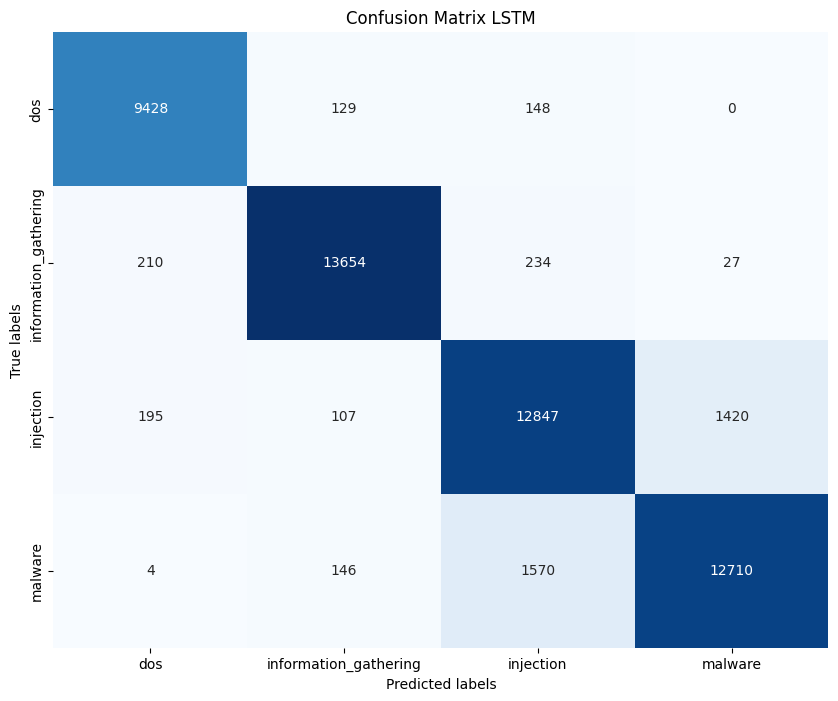

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix LSTM')
plt.show()

In [56]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow import keras

inputs = keras.Input(shape=input_shape)

x = Conv1D(filters=32, kernel_size=3, padding="same", activation='relu')(inputs)
x = MaxPooling1D(strides=2)(x)

x = Conv1D(filters=64, kernel_size=3, padding="same", activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding="same")(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs)


In [57]:
cnn_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 45, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 45, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 22, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 9, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,276 (290.14 KB)

 Trainable params: 74,276 (290.14 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=[recall_metric])

In [59]:
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [60]:
from keras.callbacks import EarlyStopping
EPOCHS=40
BATCH_SIZE=256
history = cnn_model.fit(X_train, y_train_cat,
                    validation_data=(X_val, y_val_cat),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=early_stopping_cnn)

Epoch 1/40


I0000 00:00:1732447925.423293    1016 service.cc:145] XLA service 0x7cb220c481a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732447925.423337    1016 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732447925.423343    1016 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 69/661 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 496.3719 - recall_1: 0.7963

I0000 00:00:1732447927.924833    1016 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


661/661 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 81.4831 - recall_1: 0.7253 - val_loss: 0.8108 - val_recall_1: 0.7441
Epoch 2/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5555 - recall_1: 0.7724 - val_loss: 0.3675 - val_recall_1: 0.7938
Epoch 3/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7396 - recall_1: 0.8072 - val_loss: 0.3092 - val_recall_1: 0.8326
Epoch 4/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3032 - recall_1: 0.8424 - val_loss: 0.2905 - val_recall_1: 0.8436
Epoch 5/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2830 - recall_1: 0.8487 - val_loss: 0.2752 - val_recall_1: 0.8574
Epoch 6/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5689 - recall_1: 0.8530 - val_loss: 0.2641 - val_recall_1: 0.8578
Epoch 7/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2578 - recall_1: 0.8624 - val_loss: 0.2620 - val_recall_1: 0.8582
Epoch 8/40
661/661 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2453 - recall_1: 0.8685 - val_loss: 0.2472 - val_rec

In [61]:
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

1651/1651 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [62]:
report = evaluate(y_test, predicted_labels_cnn)
print(report)

{'Accuracy': 0.92, 'Recall': 0.92, 'Precision': 0.93, 'F1 Score': 0.92}


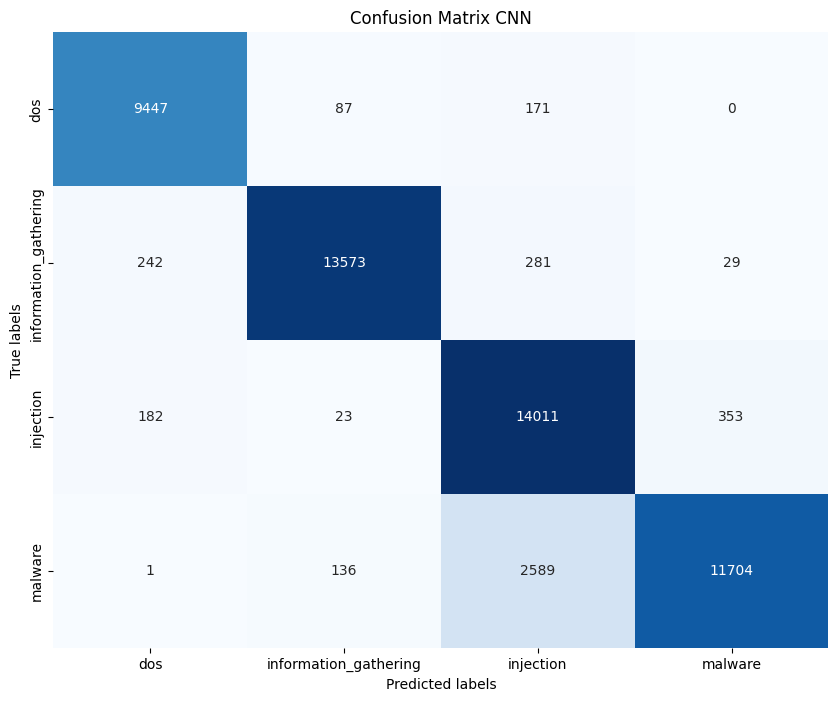

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, predicted_labels_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN')
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_cat)

RandomForestClassifier()

In [65]:
y_test_pred_rf = rf_clf.predict(X_test)

y_test_pred_rf = np.argmax(y_test_pred_rf, axis=1)

eval_result = evaluate(y_test,y_test_pred_rf)
print(eval_result)

{'Accuracy': 0.93, 'Recall': 0.93, 'Precision': 0.93, 'F1 Score': 0.93}


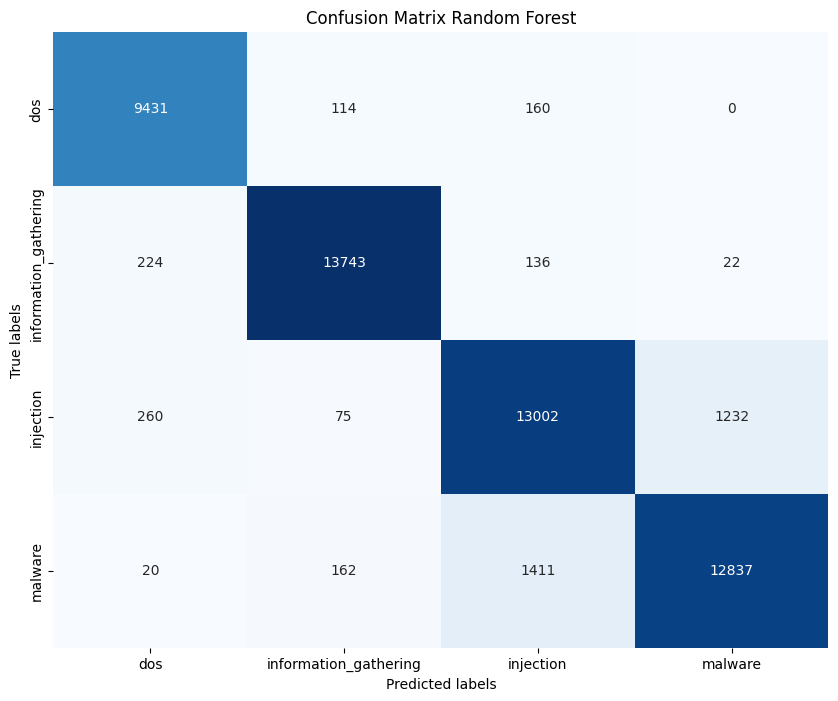

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_ 

conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train_cat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred_xgb_1 = xgb.predict(X_test)
y_pred_xgb_1 = np.argmax(y_pred_xgb_1, axis=1)

eval_result = evaluate(y_test,y_pred_xgb_1)
print(eval_result)

{'Accuracy': 0.93, 'Recall': 0.93, 'Precision': 0.94, 'F1 Score': 0.93}


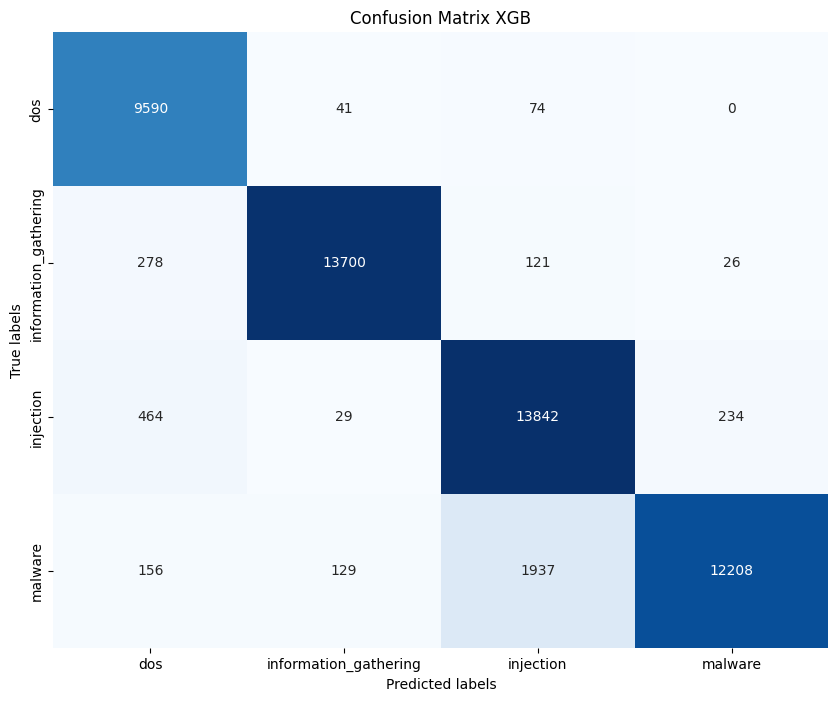

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_names = label_encoder.classes_  # Assuming label_encoder is your label encoder object

conf_matrix = confusion_matrix(y_test, y_pred_xgb_1)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGB')
plt.show()